In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
CTLT = wb.DataReader('CTLT', data_source='yahoo', start='1995-1-1')

In [4]:
CTLT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-07-31,20.33,19.299999,20.000000,19.990000,14208300,19.990000
2014-08-01,20.10,19.340000,20.000000,19.850000,2125600,19.850000
2014-08-04,20.10,19.600000,19.850000,20.010000,592800,20.010000
2014-08-05,20.48,19.770000,19.940001,20.209999,1077600,20.209999
2014-08-06,20.33,20.049999,20.200001,20.330000,900900,20.330000


In [5]:
# Simple rate return

CTLT['simple_return'] = (CTLT['Adj Close'] / CTLT['Adj Close'].shift(1)) - 1
print(CTLT['simple_return'])

Date
2014-07-31         NaN
2014-08-01   -0.007003
2014-08-04    0.008060
2014-08-05    0.009995
2014-08-06    0.005938
                ...   
2019-12-30    0.003366
2019-12-31   -0.006003
2020-01-02    0.005329
2020-01-03   -0.010954
2020-01-06    0.000179
Name: simple_return, Length: 1368, dtype: float64


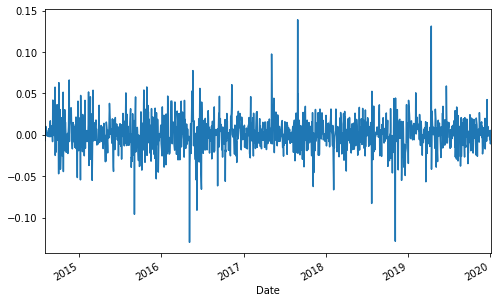

In [6]:
CTLT['simple_return'].plot(figsize=(8, 5))
plt.show()

In [7]:
avg_return_d = CTLT['simple_return'].mean()
avg_return_d

0.0009554257131396593

In [8]:
avg_return_a = CTLT['simple_return'].mean() * 250
avg_return_a

0.23885642828491482

In [9]:
print(str(round(avg_return_a, 5) * 100) + '%')

23.886%


# Log return

In [10]:
CTLT.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
2014-07-31,20.33,19.299999,20.000000,19.990000,14208300,19.990000,NaN
2014-08-01,20.10,19.340000,20.000000,19.850000,2125600,19.850000,-0.007003
2014-08-04,20.10,19.600000,19.850000,20.010000,592800,20.010000,0.008060
2014-08-05,20.48,19.770000,19.940001,20.209999,1077600,20.209999,0.009995
2014-08-06,20.33,20.049999,20.200001,20.330000,900900,20.330000,0.005938


In [11]:
CTLT['log_return'] = np.log(CTLT['Adj Close'] / CTLT['Adj Close'].shift(1))
print(CTLT['log_return'])

Date
2014-07-31         NaN
2014-08-01   -0.007028
2014-08-04    0.008028
2014-08-05    0.009945
2014-08-06    0.005920
                ...   
2019-12-30    0.003360
2019-12-31   -0.006021
2020-01-02    0.005314
2020-01-03   -0.011014
2020-01-06    0.000179
Name: log_return, Length: 1368, dtype: float64


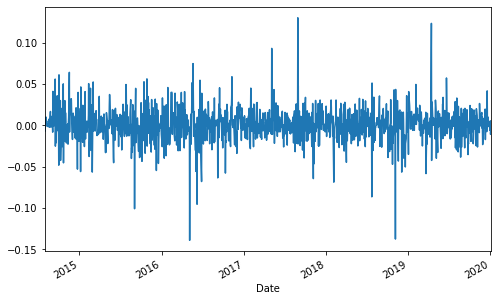

In [12]:
CTLT['log_return'].plot(figsize=(8, 5))
plt.show()

In [13]:
avg_return_d = CTLT['log_return'].mean()
avg_return_d

0.0007534315993242772

In [14]:
avg_return_a = CTLT['log_return'].mean() * 250
avg_return_a

0.1883578998310693

In [16]:
print("Annual return is ", str(round(avg_return_a, 5) * 100) + '%')

Annual return is  18.836%


# Portofolio return


In [17]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [18]:
tickers = ['CTLT', 'TECH', 'BRKR', 'XRAY']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [19]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1368 entries, 2014-07-31 to 2020-01-06
Data columns (total 4 columns):
CTLT    1368 non-null float64
TECH    1368 non-null float64
BRKR    1368 non-null float64
XRAY    1368 non-null float64
dtypes: float64(4)
memory usage: 53.4 KB


In [22]:
mydata.head()

,CTLT,TECH,BRKR,XRAY
Date,,,,
2014-07-31,19.990000,87.973976,22.260036,44.794533
2014-08-01,19.850000,87.766556,21.936861,44.842777
2014-08-04,20.010000,87.823135,22.132727,45.180523
2014-08-05,20.209999,87.549744,22.357969,44.784870
2014-08-06,20.330000,87.785416,22.328590,45.190174


In [23]:
mydata.tail()

,CTLT,TECH,BRKR,XRAY
Date,,,,
2019-12-30,56.639999,217.460007,50.439999,56.400002
2019-12-31,56.299999,219.509995,50.970001,56.590000
2020-01-02,56.599998,219.460007,51.360001,56.930000
2020-01-03,55.980000,216.679993,50.419998,56.299999
2020-01-06,55.990002,217.160004,50.570000,56.610001


# Normalization to 100

In [24]:
mydata.iloc[0]

CTLT    19.990000
TECH    87.973976
BRKR    22.260036
XRAY    44.794533
Name: 2014-07-31 00:00:00, dtype: float64

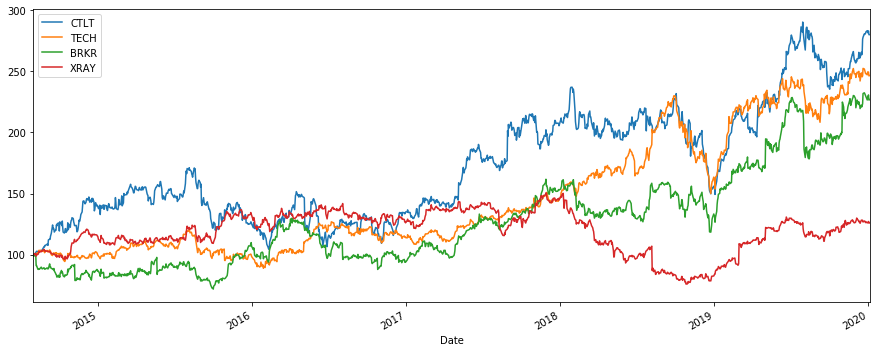

In [25]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

# Put all stocks in the same date and initial 

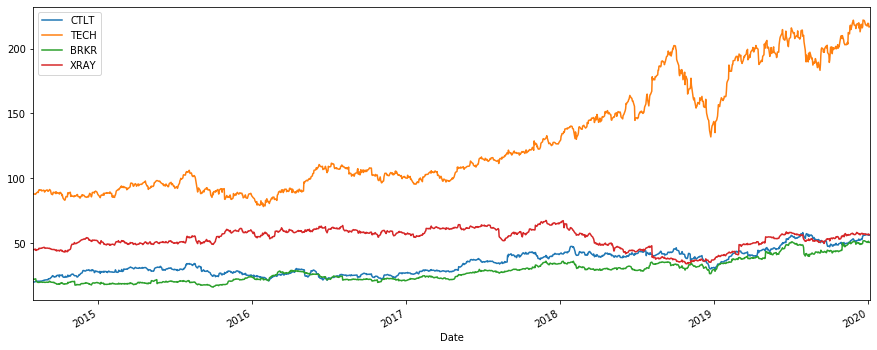

In [26]:
mydata.plot(figsize=(15,6))
plt.show()

In [28]:
mydata.loc['2014-07-31']

CTLT    19.990000
TECH    87.973976
BRKR    22.260036
XRAY    44.794533
Name: 2014-07-31 00:00:00, dtype: float64

# Calculating the return of a portfolio of securities

In [29]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,CTLT,TECH,BRKR,XRAY
Date,,,,
2014-07-31,NaN,NaN,NaN,NaN
2014-08-01,-0.007003,-0.002358,-0.014518,0.001077
2014-08-04,0.008060,0.000645,0.008929,0.007532
2014-08-05,0.009995,-0.003113,0.010177,-0.008757
2014-08-06,0.005938,0.002692,-0.001314,0.009050


In [30]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [31]:
np.dot(returns, weights)

array([        nan, -0.0057006 ,  0.00629137, ...,  0.00469013,
       -0.01324751,  0.00271881])

In [32]:
annual_return = returns.mean() * 250
annual_return

CTLT    0.238856
TECH    0.190437
BRKR    0.194163
XRAY    0.070087
dtype: float64

In [33]:
np.dot(annual_return, weights)

0.1733855675941915

In [34]:
pfolio_1 = str(round(np.dot(annual_return, weights), 5) * 100) + '%'
print(pfolio_1)


17.339%


In [35]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [36]:
pfolio_2 = str(round(np.dot(annual_return, weights_2), 5) * 100) + '%'
print(pfolio_1)
print(pfolio_2)

17.339%
20.435%


# Calculating the return of indices

In [37]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [38]:
tickers = ['^GSPC', '^IXIC', '^GDAXI', '^RUT']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='1997-1-1')['Adj Close']
    
    

In [39]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^RUT
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,358.959991
1997-01-03,748.030029,1310.680054,2863.260010,361.850006
1997-01-06,747.650024,1316.400024,2890.199951,362.309998
1997-01-07,753.229980,1327.729980,2876.340088,364.160004
1997-01-08,748.409973,1320.349976,2904.080078,364.170013


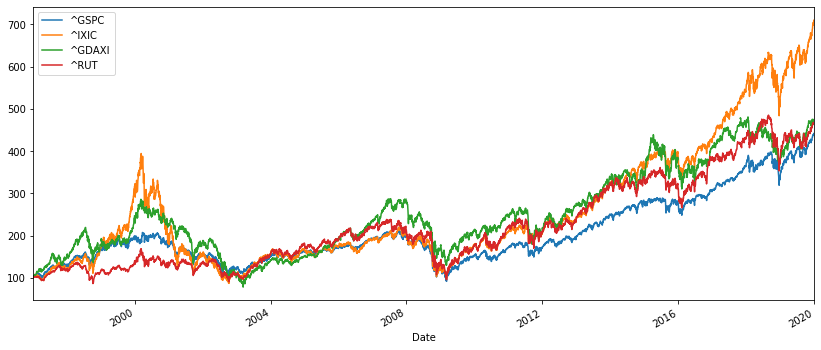

In [40]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(14,6))
plt.show()

In [41]:
ind_returns = (ind_data / ind_data.shift(1)) - 1

ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^RUT
Date,,,,
2019-12-30,-0.005781,-0.006732,-0.006606,-0.002924
2019-12-31,0.002946,0.002974,NaN,0.002596
2020-01-02,0.008379,0.013328,NaN,-0.001019
2020-01-03,-0.007060,-0.007855,-0.012460,-0.003540
2020-01-06,0.003533,0.005620,-0.006971,0.001439


In [42]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.081701
^IXIC     0.114914
^GDAXI    0.078790
^RUT      0.091707
dtype: float64

In [44]:
tickers = ['CTLT', '^GSPC', '^RUT']

data_2 = pd.DataFrame()

for t in tickers:
    data_2[t] = wb.DataReader(t, data_source='yahoo', start='2014-7-31')['Adj Close']
    
    

In [45]:
data_2.tail()

,CTLT,^GSPC,^RUT
Date,,,
2019-12-30,56.639999,3221.290039,1664.150024
2019-12-31,56.299999,3230.780029,1668.469971
2020-01-02,56.599998,3257.850098,1666.770020
2020-01-03,55.980000,3234.850098,1660.869995
2020-01-06,55.990002,3246.280029,1663.260010


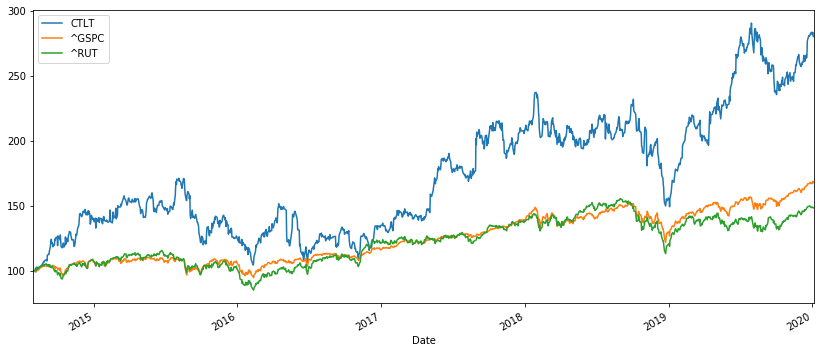

In [46]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(14,6))
plt.show()

# Calculating the risk of a security

## Catalent Inc analysis for the five 5 years

In [47]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [48]:
tickers = ['CTLT', 'MDT']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2014-7-31')['Adj Close']
    

In [49]:
sec_data.tail()

,CTLT,MDT
Date,,
2019-12-30,56.639999,112.930000
2019-12-31,56.299999,113.449997
2020-01-02,56.599998,114.559998
2020-01-03,55.980000,113.879997
2020-01-06,55.990002,114.889999


In [50]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [52]:
sec_returns.head()
#sec_returns.shape

,CTLT,MDT
Date,,
2014-07-31,NaN,NaN
2014-08-01,-0.007028,-0.004220
2014-08-04,0.008028,0.015975
2014-08-05,0.009945,-0.007714
2014-08-06,0.005920,-0.011193


# CTLT

In [53]:
sec_returns['CTLT'].mean()

0.0007534315993242772

In [54]:
sec_returns['CTLT'].mean() * 100

0.07534315993242773

In [55]:
sec_returns['CTLT'].std()

0.02010456626369755

In [56]:
sec_returns['CTLT'].std() * 250 * 0.5

2.5130707829621937

# MDT

In [58]:
sec_returns['MDT'].mean()

0.0005381085348524407

In [59]:
sec_returns['MDT'].mean() * 100

0.053810853485244066

In [60]:
sec_returns['MDT'].std()

0.011731408559837944

In [61]:
sec_returns['MDT'].std() * 250 * 0.5

1.466426069979743

In [62]:
print(sec_returns['CTLT'].mean() * 250)
print(sec_returns['MDT'].mean() * 250)

0.1883578998310693
0.13452713371311018


In [63]:
sec_returns[['CTLT', 'MDT']].mean() * 250

CTLT    0.188358
MDT     0.134527
dtype: float64

In [64]:
sec_returns[['CTLT', 'MDT']].std() * 250

CTLT    5.026142
MDT     2.932852
dtype: float64

# Covariance and Correlation

In [65]:
pg_var = sec_returns['CTLT'].var()
pg_var

0.00040419358465140575

In [66]:
bei_var = sec_returns['MDT'].var()
bei_var

0.00013762594679783897

In [67]:
pg_var_a = sec_returns['CTLT'].var() * 250
pg_var_a

0.10104839616285144

In [68]:
bei_var_a = sec_returns['MDT'].var() * 250
bei_var_a

0.03440648669945974

In [69]:
cov_matrix = sec_returns.cov()
cov_matrix

,CTLT,MDT
CTLT,0.000404,0.000073
MDT,0.000073,0.000138


In [70]:
cov_matrix_a = sec_returns.cov() * 100
cov_matrix_a

,CTLT,MDT
CTLT,0.040419,0.007314
MDT,0.007314,0.013763


In [71]:
corr_mat = sec_returns.corr()
corr_mat

,CTLT,MDT
CTLT,1.000000,0.310122
MDT,0.310122,1.000000


# Calculating Portfolio risk

In [72]:
# Equal weights scheme

weights = np.array([0.5, 0.5])

In [73]:
# Portfolio Variance

pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var


0.0430066889078288

In [74]:
# Portfolio Volatility

pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.20738054129505207

In [75]:
print(str(round(pfolio_vol, 5) * 100) + '%')

20.738%


In [76]:
help(round)

Help on built-in function round in module builtins:

round(number, ndigits=None)
    Round a number to a given precision in decimal digits.
    
    The return value is an integer if ndigits is omitted or None.  Otherwise
    the return value has the same type as the number.  ndigits may be negative.



 # Calculating Diversifiable and non-diversifialble risk portfolio
    

In [77]:
weights = np.array([0.5, 0.5])

In [78]:
weights[0]

0.5

In [79]:
weights[1]

0.5

# Diversifiable risk

In [80]:
pg_var_a = sec_returns[['CTLT']].var() * 250
pg_var_a

CTLT    0.101048
dtype: float64

In [81]:
bei_var_a = sec_returns[['MDT']].var() * 250
bei_var_a

MDT    0.034406
dtype: float64

In [82]:
dr = pfolio_var - (weights[0] ** 2 * pg_var_a) - (weights[1] ** 2 * bei_var_a)
dr

# the vector of nan 

CTLT   NaN
MDT    NaN
dtype: float64

In [83]:
float(pg_var_a)

0.10104839616285144

In [84]:
# without two brackets

bei_var_a = sec_returns['MDT'].var() * 250
bei_var_a

0.03440648669945974

In [85]:
pg_var_a = sec_returns['CTLT'].var() * 250
pg_var_a

0.10104839616285144

In [86]:
dr = pfolio_var - (weights[0] ** 2 * pg_var_a) - (weights[1] ** 2 * bei_var_a)
dr


0.009142968192251005

In [87]:
print(str(round(dr*100, 3)) + '%')

0.914%


# Non diversifiable risk

In [88]:
n_dr_1 = pfolio_var - dr
n_dr_1

0.03386372071557779

In [89]:
n_dr_2 = (weights[0] ** 2 * pg_var_a) + (weights[1] ** 2 * bei_var_a)
n_dr_2

0.03386372071557779

In [90]:
n_dr_1 == n_dr_2

True

In [98]:
print(dr, n_dr_1)

0.009142968192251005 0.03386372071557779
